In [4]:
import pandas as pd

# Chargement du fichier Excel
df = pd.read_excel("US Superstore data.xls")

# Affiche les 5 premières lignes
print(df.head())

# Informations générales sur les colonnes
print(df.info())

# Statistiques descriptives
print(df.describe())

# Nombre de valeurs manquantes par colonne
print(df.isnull().sum())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [5]:
df = df.drop_duplicates()


In [6]:
df["Profit Margin (%)"] = (df["Profit"] / df["Sales"]) * 100

df["order_year"] = df["Order Date"].dt.year
df["order_month"] = df["Order Date"].dt.month

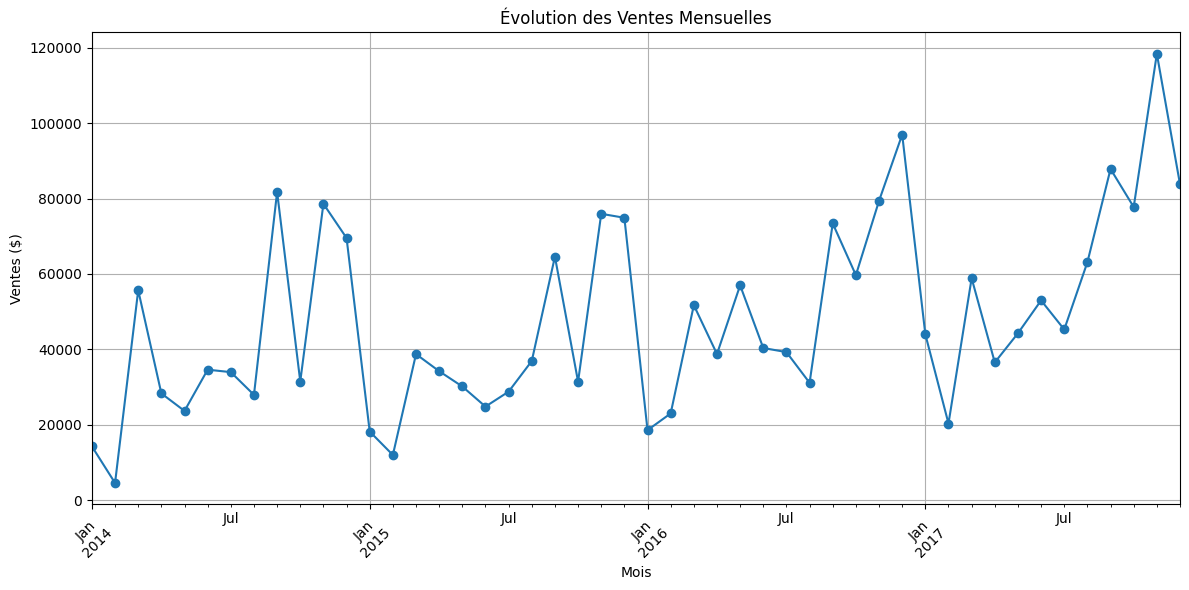

In [7]:
df["Year-Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Year-Month")["Sales"].sum()
import matplotlib.pyplot as plt

monthly_sales.plot(figsize=(12,6), marker='o')
plt.title("Évolution des Ventes Mensuelles")
plt.xlabel("Mois")
plt.ylabel("Ventes ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


In [9]:
import ipywidgets as widgets
from ipywidgets import interact


In [10]:
import pandas as pd

In [11]:
df["Order Date"] = pd.to_datetime(df["Order Date"])


In [12]:
def plot_sales_by_category(category):
    filtered_df = df[df["Category"] == category].copy()
    filtered_df["Year-Month"] = filtered_df["Order Date"].dt.to_period("M")
    filtered_df = filtered_df[filtered_df["Order Date"].dt.year >= 2015]  # filtrer les années
    
    sales_by_month = filtered_df.groupby("Year-Month")["Sales"].sum()

    plt.figure(figsize=(12,6))
    sales_by_month.plot(marker='o')
    plt.title(f"Ventes Mensuelles pour la catégorie : {category}")
    plt.xlabel("Mois")
    plt.ylabel("Ventes ($)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [13]:
categories = df["Category"].unique()
interact(plot_sales_by_category, category=widgets.Dropdown(options=categories))


interactive(children=(Dropdown(description='category', options=('Furniture', 'Office Supplies', 'Technology'),…

<function __main__.plot_sales_by_category(category)>

In [14]:
# Création d'une colonne 'Profit Margin'
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Extraction de l'année et du mois à partir de la date de commande
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# Vérification
df[['Sales', 'Profit', 'Profit Margin', 'Order Date', 'Order Year', 'Order Month']].head()


,Sales,Profit,Profit Margin,Order Date,Order Year,Order Month
0,261.9600,41.9136,16.00,2016-11-08,2016,11
1,731.9400,219.5820,30.00,2016-11-08,2016,11
2,14.6200,6.8714,47.00,2016-06-12,2016,6
3,957.5775,-383.0310,-40.00,2015-10-11,2015,10
4,22.3680,2.5164,11.25,2015-10-11,2015,10


In [15]:
# On crée une nouvelle colonne "Year-Month" pour grouper par mois
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Agrégation des ventes par mois
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)


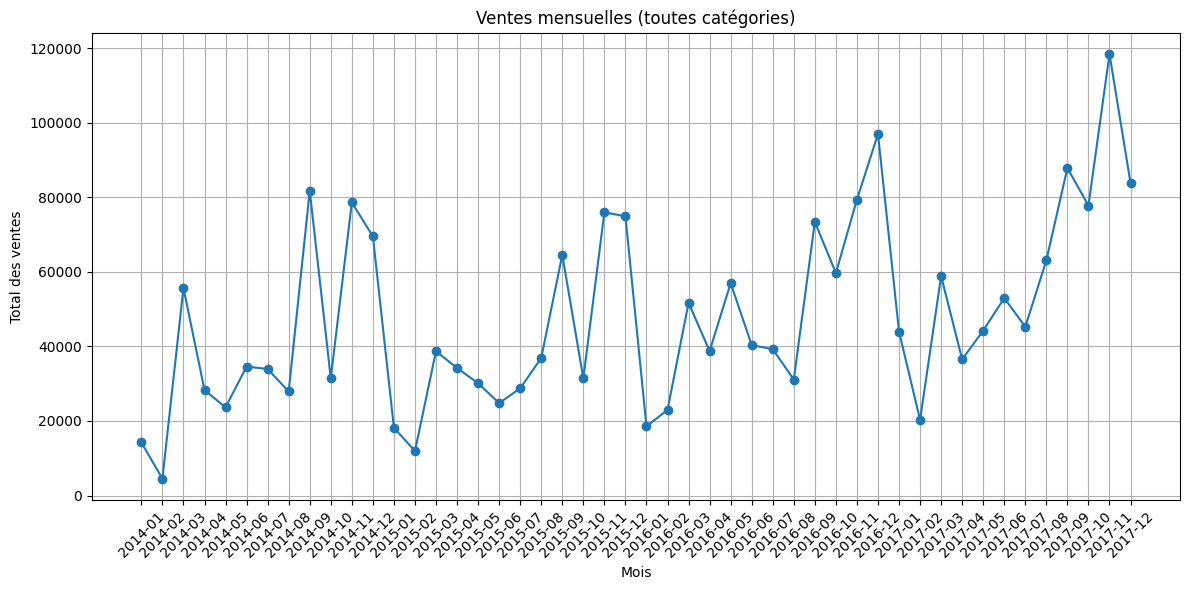

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title('Ventes mensuelles (toutes catégories)')
plt.xlabel('Mois')
plt.ylabel('Total des ventes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Récupération des catégories uniques
categories = df['Category'].unique()

# Fonction d'affichage dynamique
def plot_sales_by_category(category):
    df_filtered = df[df['Category'] == category]
    monthly_sales = df_filtered.groupby(df_filtered['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
    monthly_sales['Order Date'] = monthly_sales['Order Date'].astype(str)

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o')
    plt.xticks(rotation=45)
    plt.title(f'Ventes mensuelles – {category}')
    plt.xlabel('Mois')
    plt.ylabel('Total des ventes')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

dropdown = widgets.Dropdown(
    options=categories,
    description='Catégorie :',
    style={'description_width': 'initial'}
)

widgets.interact(plot_sales_by_category, category=dropdown)


interactive(children=(Dropdown(description='Catégorie :', options=('Furniture', 'Office Supplies', 'Technology…

<function __main__.plot_sales_by_category(category)>

In [ ]:
def plot_top_states(n):
    state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(n)

    plt.figure(figsize=(12, 6))
    state_sales.plot(kind='bar', color='#651FFF')
    plt.title(f'Top {n} États par ventes')
    plt.xlabel('État')
    plt.ylabel('Total des ventes')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

slider = widgets.IntSlider(
    value=10,
    min=1,
    max=50,
    step=1,
    description='Top N États :',
    style={'description_width': 'initial'}
)

widgets.interact(plot_top_states, n=slider)


interactive(children=(IntSlider(value=10, description='Top N États :', max=50, min=1, style=SliderStyle(descri…

<function __main__.plot_top_states(n)>

C:\Users\isaac\AppData\Local\Temp\ipykernel_54388\3995458699.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\isaac\AppData\Local\Temp\ipykernel_54388\3995458699.py:27: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\isaac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


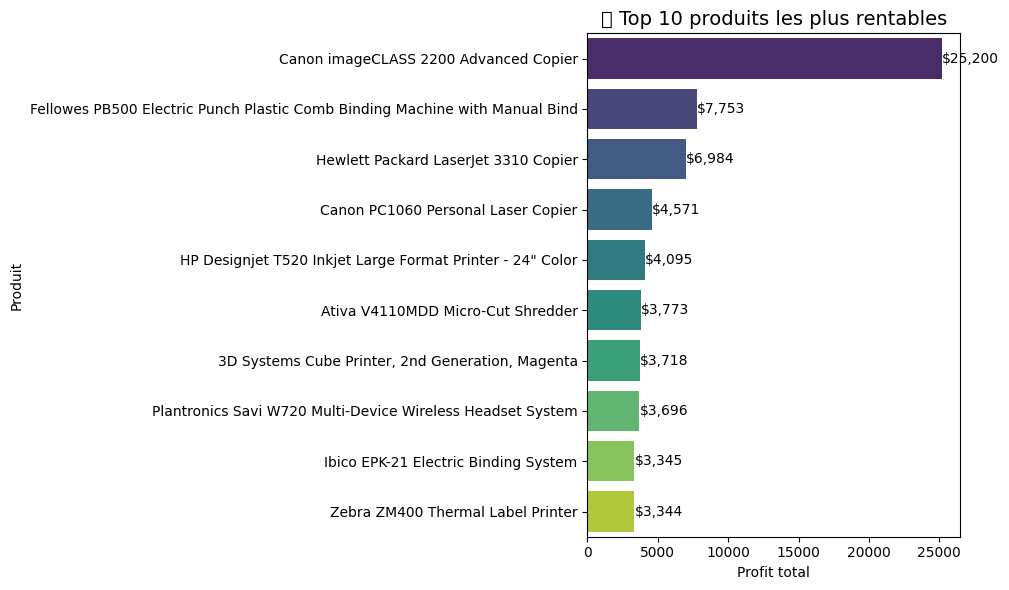

In [19]:
import seaborn as sns

# On agrège les profits par produit
top_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

# Préparation du DataFrame pour visualisation
top_products_df = top_products.reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_products_df,
    y="Product Name",
    x="Profit",
    palette="viridis"
)

# Titres et labels
plt.title("🔝 Top 10 produits les plus rentables", fontsize=14)
plt.xlabel("Profit total")
plt.ylabel("Produit")

# Annoter les barres avec la valeur
for i, val in enumerate(top_products_df["Profit"]):
    plt.text(val, i, f"${val:,.0f}", va='center')

plt.tight_layout()
plt.show()


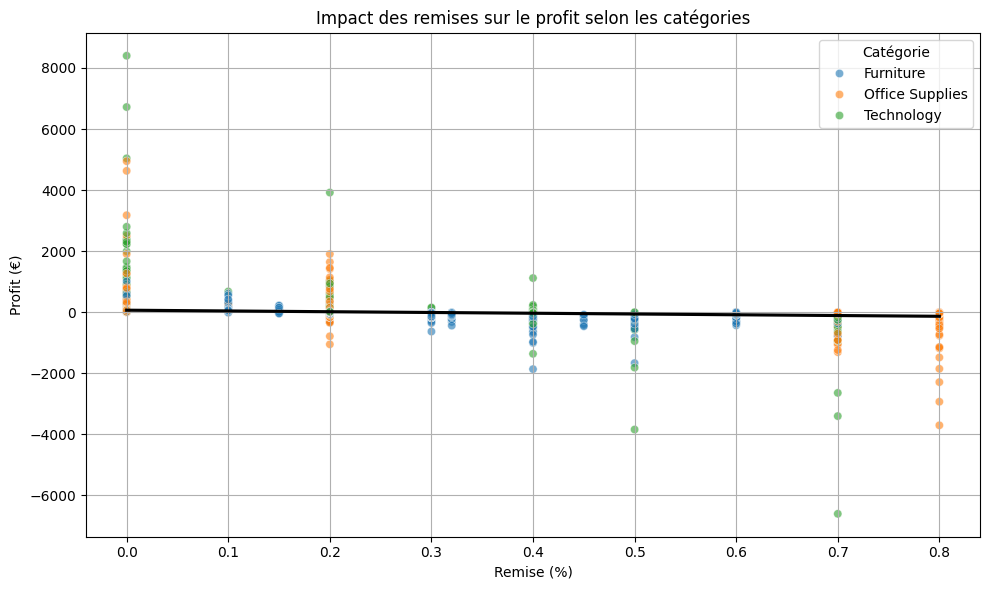

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Discount",
    y="Profit",
    hue="Category",
    alpha=0.6
)

# Ajoute une régression globale
sns.regplot(
    data=df,
    x="Discount",
    y="Profit",
    scatter=False,
    color="black"
)

plt.title("Impact des remises sur le profit selon les catégories")
plt.xlabel("Remise (%)")
plt.ylabel("Profit (€)")
plt.legend(title="Catégorie")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔎 Executive Summary

- La majorité du chiffre d’affaires est concentrée dans quelques États (notamment California et New York), mais certains États à fort volume comme Texas sont moins rentables.
- 20 % des clients génèrent environ 80 % des ventes et des profits — la loi de Pareto est bien vérifiée. Il est essentiel de fidéliser ces clients.
- Au-delà de 20 % de remise, le profit devient largement négatif. L’impact est encore plus marqué sur la catégorie "Furniture".
- Les villes comme Los Angeles et New York sont à prioriser pour les campagnes marketing, tandis que certaines zones à forte remise comme Philadelphia méritent une stratégie de correction.
- Recommandation : limiter les remises à 20 % max, mettre en place une validation manuelle au-delà, et concentrer les efforts marketing sur les 20 % de clients et produits les plus rentables.


In [ ]:
!git add .
!git commit -m "Analyse des données de vente et profitabilité"
!git push origin main